In [1]:
import functions
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.rcParams["font.size"] = 16

matrix_nums = functions.get_overlap_matrix()
matrix_perc = functions.get_overlap_matrix_to_perc()

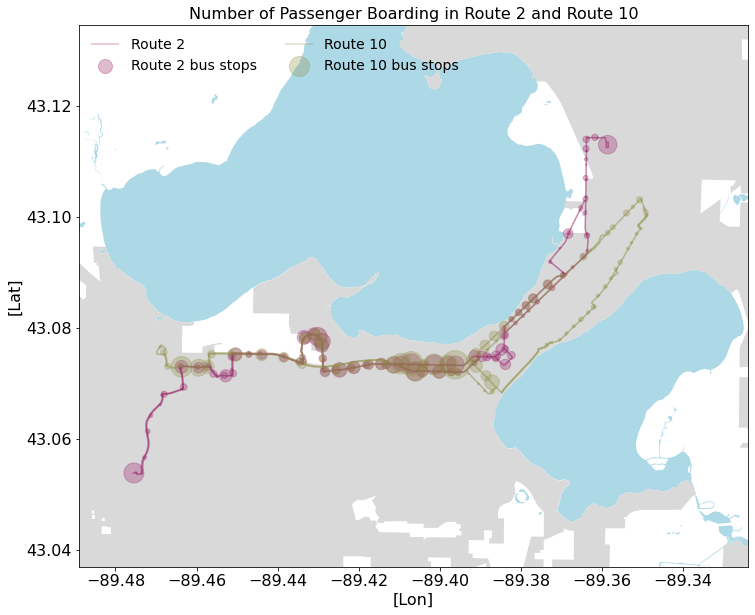

In [7]:
ax = functions.plot_background()

# route we're looking at: 2
# route that exceeds threshold: 10
functions.plot_route(ax=ax, route_num=2, alpha=0.3, zorder=4, label="Route 2")
functions.plot_stops_sized(ax=ax, route_num=2, day_type="wkd",
                           alpha=0.3, zorder=2, label="Route 2 bus stops")

# route 10
functions.plot_route(ax=ax, route_num=10, alpha=0.3, zorder=4, label="Route 10")
functions.plot_stops_sized(ax=ax, route_num=10, day_type="wkd",
                           alpha=0.3, zorder=2, label="Route 10 bus stops")


# plot setting
ax.margins(x=-0.25, y=-0.25) # TODO: code a automation to zoom in/out to desired place
plt.legend(loc="upper left", frameon=False, fontsize=14, ncol=2)
plt.title("Number of Passenger Boarding in Route 2 and Route 10", fontsize=16, y=1)
# plt.axis("off")
# plt.savefig("../report_andy/Oct_5th/route2_against_route10_sized.png", dpi=300, bbox_inches="tight")
None




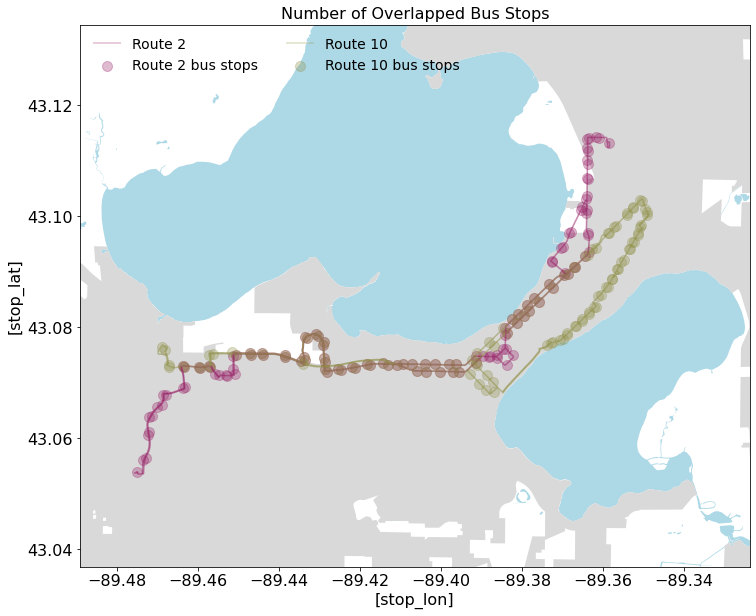

In [3]:
ax = functions.plot_background()

functions.plot_route(ax=ax, route_num=2, alpha=0.3, zorder=4, label="Route 2")
functions.plot_stops(ax=ax, route_num=2, alpha=0.3, s=100,
                     zorder=2, label="Route 2 bus stops")

# route 10
functions.plot_route(ax=ax, route_num=10, alpha=0.3, zorder=4, label="Route 10")
functions.plot_stops(ax=ax, route_num=10, alpha=0.3, s=100,
                     zorder=2, label="Route 10 bus stops")

ax.margins(x=-0.25, y=-0.25) # TODO: code a automation to zoom in/out to desired place
plt.legend(loc="upper left", frameon=False, fontsize=14, ncol=2)
plt.title("Number of Overlapped Bus Stops", fontsize=16, y=1)

# plt.axis("off")
# plt.savefig("../report_andy/Oct_5th/route2_against_route10", dpi=300, bbox_inches="tight")
None



In [18]:
wkd = pd.read_csv("../data_andy/Daily_Boardings_Based_on_Routes_and_Bus_Stops/Metro_Transit_Ridership_by_Route_Weekday.csv")
wkd[wkd["Route"] == 2]

,OBJECTID,StopID,Route,Lat,Lon,DailyBoard,DotSize,geometry
32,20039,100,2,43.073353,-89.401358,178.79,1787943.08,POINT (-89.40135196641265 43.0733450574635)
71,20078,133,2,43.073337,-89.413257,36.16,361593.97,POINT (-89.41325096268501 43.07332905855433)
89,20096,160,2,43.073506,-89.409433,121.72,1217180.92,POINT (-89.40942696418283 43.07349805822999)
130,20137,178,2,43.073505,-89.407051,194.93,1949269.62,POINT (-89.40704496541412 43.07349705785434)
174,20181,234,2,43.073403,-89.403854,24.03,240320.91,POINT (-89.40384796592475 43.07339505766051)
...,...,...,...,...,...,...,...,...
2166,22173,2925,2,43.056585,-89.472784,7.45,74543.99,POINT (-89.47277794687862 43.05657706419009)
2177,22184,2945,2,43.074633,-89.438481,32.82,328216.06,POINT (-89.43847495603086 43.07462506000874)
2205,22212,2984,2,43.055941,-89.473471,0.11,1112.60,POINT (-89.47346494735514 43.05593306433241)
2518,22525,5100,2,43.112950,-89.358550,172.90,1728975.45,POINT (-89.35854397523489 43.11294204920503)


In [19]:
functions.get_stop_info_of_route(2)


,OBJECTID,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,agency_id,location_t,parent_sta,wheelchair,Route,Route_Dir,Shelter,Bench,Schedule,Light,Reaitime,PK_MD_WE,jurisdicti,relative_p,cardinal_d,primary_st,address_ra,cross_loca,geometry
0,12804,5100,5100,North Transfer Point,This stop (#5100) is on the pedestrian island ...,43.113253,-89.358540,MMT,0,5000.0,1,"2, 4, 17, 20, 21, 22, 27",None,1,0,1,1,1,111,MTSM,5,NaN,North Transfer Point,1213,Huxley,POINT (-89.35853910475025 43.11325541503273)
1,12806,6100,6100,West Transfer Point,This stop (#6100) is on the pedestrian island ...,43.053883,-89.475098,MMT,0,6000.0,1,"2, 6, 7, 11, 12, 18, 50, 51, 52, 55, 59, 63, 6...",None,1,0,1,1,1,111,MTSM,5,NaN,West Transfer Point,5700,Tokay,POINT (-89.47509725588517 43.05388525607819)
2,12829,100,0100,University & N Park (WB),This stop (#0100) is westbound on the 900 bloc...,43.073399,-89.401365,MMT,0,NaN,1,"2, 4, 7, 8, 10, 11, 12, 13, 15, 27, 48, 70, 72",None,1,0,1,0,0,111,CMAD,1,270.0,University,900,N Park,POINT (-89.4013642019561 43.07340134121569)
3,12837,133,0133,University & N Breese (EB),This stop (#0133) is eastbound on the 1599 blo...,43.073275,-89.413154,MMT,0,NaN,1,"2, 10, 12, 48",None,1,0,1,0,0,111,CMAD,1,90.0,University,1599,N Breese,POINT (-89.41315320114077 43.07327732819645)
4,12843,160,0160,University & N Randall (WB),This stop (#0160) is westbound on the 1400 blo...,43.073481,-89.409413,MMT,0,NaN,1,"2, 8, 10, 12, 15, 27, 48, 70, 72",None,1,0,1,0,0,111,CMAD,1,270.0,University,1400,N Randall,POINT (-89.40941220169412 43.07348333257609)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,13523,2916,2916,Highland & Observatory (SB),This stop (#2916) is southbound on the 898 blo...,43.076794,-89.429190,MMT,0,NaN,1,"2, 10, 11, 44",None,1,0,1,0,0,111,UWIS,1,180.0,Highland,898,Observatory,POINT (-89.4291891889164 43.07679631071301)
118,13525,2921,2921,University & Princeton (EB),This stop (#2921) is eastbound on the 1899 blo...,43.073222,-89.417438,MMT,0,NaN,1,"2, 10, 48, 82",None,0,0,0,0,0,111,CMAD,1,90.0,University,1899,Princeton,POINT (-89.41743720122477 43.07322432310743)
119,13527,2925,2925,S Whitney & Science (NB),This stop (#2925) is northbound on the 519 blo...,43.056418,-89.472755,MMT,0,NaN,1,"2, 12, 67, 68",None,0,0,0,0,0,111,CMAD,1,0.0,S Whitney,519,Science,POINT (-89.47275424854215 43.05642025818652)
120,13532,2945,2945,University & Ridge (EB),This stop (#2945) is eastbound on the 2899 blo...,43.074573,-89.438473,MMT,0,NaN,1,"2, 10, 11, 12, 15, 70, 72",None,0,0,1,0,0,111,CMAD,1,90.0,University,2899,Ridge,POINT (-89.43847219500584 43.07457529924334)
